Create Mediterranean mask

In [1]:
import xarray as xr

<xarray.Dataset>
Dimensions:  (lat: 65, lon: 192)
Coordinates:
  * lat      (lat) float64 30.12 30.38 30.62 30.88 ... 45.38 45.62 45.88 46.12
  * lon      (lon) float64 -4.875 -4.625 -4.375 -4.125 ... 42.38 42.62 42.88
Data variables:
    mask     (lat, lon) bool False False False False ... False False False False

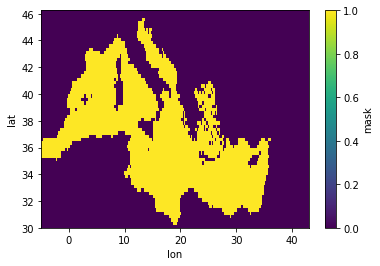

In [2]:
mask_file = 'datasets/med00-ogs-bio-an-fc-d_1611233647884.nc'
ds_path = 'datasets/METOFFICE-GLO-SST-L4-NRT-OBS-SKIN-DIU-FV01.1_1607013925530.nc' 
ds = xr.open_dataset(ds_path)
mask = xr.open_dataset(mask_file)
mask_f = mask.squeeze()
mask_f = mask_f.rename_dims({'latitude': 'lat', 'longitude':'lon'})
mask_f = mask_f.rename({'latitude': 'lat', 'longitude':'lon'})

mask_f = mask_f.interp_like(ds)
mask_f = mask_f['nppv'].notnull().to_dataset()
mask_f = mask_f.drop_vars({'depth', 'time'})
mask_final = mask_f.rename({'nppv': 'mask'})
#print(ds)
mask_final['mask'].plot()
mask_final.to_netcdf('datasets/Mediterranean_mask_TEMP.nc')
mask_final